### Mapping the observations

Just a notebook to make some maps showing the observations in the Eumetnet WOW dataset

In [12]:
import fiona
import cartopy
import matplotlib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from geodatasets import get_path
import cartopy.crs as ccrs

In [13]:
extent = [-25, 50, 35, 70]

def make_an_empty_map():
    fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor="#EEEEEE")
    ax.set_extent(extent)
    ax.add_feature(land_50m)
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='-')
    return [fig, ax]

#### Showing one hour of raw data

(21718, 19)


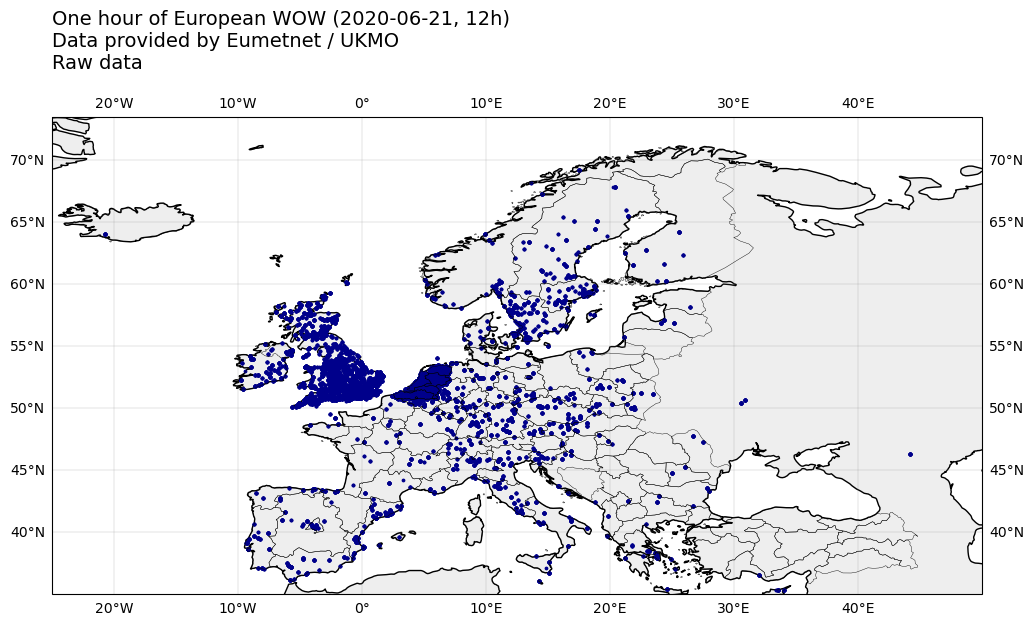

In [83]:
# Just change this path to point to the desired 'L2' file
path_in = r"/home/jovyan/work/private/data-common/KNMI/eumetnet-wow-2020/proc/L2/WOW-Eumetnet-L2-2020-06-21_12.csv"
path_in_nuts = "/home/jovyan/work/private/geodata/vector/NUTS_RG_20M_2024_4326/NUTS_RG_20M_2024_4326.shp"
path_ou_png = "/home/jovyan/work/private/Pictures/eumetnet-wow/eumetnet-wow-one-hour-raw-data.png"

fig, ax = make_an_empty_map()

# Why I am not using geopandas' read_file function to read the NUTS shapefile? Well, it was
# basically raising an error on some decoding characters thing, so I had to find a patch.
nuts_src = fiona.open(path_in_nuts)
gdf = gpd.GeoDataFrame.from_features([feature for feature in nuts_src], crs=ccrs.PlateCarree())
gdf_nuts = gdf[gdf["LEVL_CODE"]==1] # Features with lEVL_CODE=1 corresponding to NUTS 1

# Now we read one hourly file and put it all together
df = pd.read_csv(path_in, delimiter=";", parse_dates=[4])
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

gdf.plot(ax=ax, marker=".", markersize=12, color="darkblue", zorder=10)
gdf_nuts.plot(ax=ax, facecolor='None', linewidth=0.3, zorder=10)

ax.set_title("One hour of European WOW (2020-06-21, 12h) \nData provided by Eumetnet / UKMO \nRaw data", size=14, pad=20, loc="left")
print(gdf.shape)

fig.savefig(path_ou_png, dpi=200)


#### Show a density plot using matplolib's `hexbin`

(21718, 19)


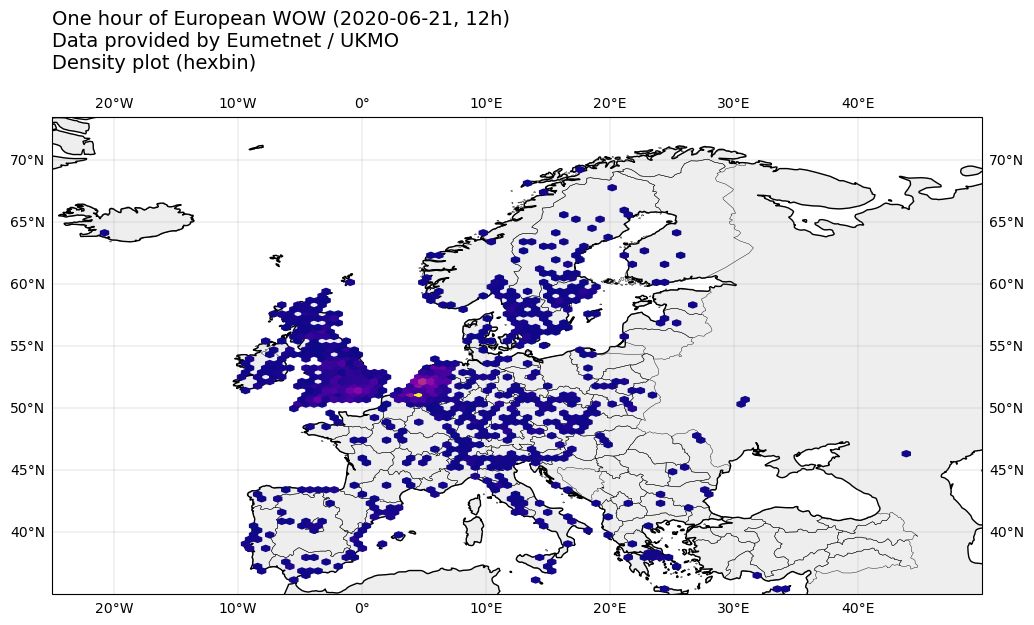

In [84]:
# Just change this path to point to the desired 'L2' file
path_in = r"/home/jovyan/work/private/data-common/KNMI/eumetnet-wow-2020/proc/L2/WOW-Eumetnet-L2-2020-06-21_12.csv"
path_in_nuts = "/home/jovyan/work/private/geodata/vector/NUTS_RG_20M_2024_4326/NUTS_RG_20M_2024_4326.shp"
path_ou_png = "/home/jovyan/work/private/Pictures/eumetnet-wow/eumetnet-wow-one-hour-density-data.png"

fig, ax = make_an_empty_map()

# Why I am not using geopandas' read_file function to read the NUTS shapefile? Well, it was
# basically raising an error on some decoding characters thing, so I had to find a patch.
nuts_src = fiona.open(path_in_nuts)
gdf = gpd.GeoDataFrame.from_features([feature for feature in nuts_src], crs=ccrs.PlateCarree())
gdf_nuts = gdf[gdf["LEVL_CODE"]==1] # Features with lEVL_CODE=1 corresponding to NUTS 1

# Now we read one hourly file and put it all together
df = pd.read_csv(path_in, delimiter=";", parse_dates=[4])
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

# gdf.plot(ax=ax, marker=".", markersize=12, color="darkblue", zorder=10)

palette = plt.get_cmap('plasma').copy()
palette.set_under('white', 0)  # 1.0 represents not transparent

ax.hexbin(gdf.Longitude, gdf.Latitude, transform=ccrs.PlateCarree(), gridsize=100,  cmap=palette, vmin=1, zorder=15)

gdf_nuts.plot(ax=ax, facecolor='None', linewidth=0.3, zorder=10)

ax.set_title("One hour of European WOW (2020-06-21, 12h) \nData provided by Eumetnet / UKMO \nDensity plot (hexbin)", size=14, pad=20, loc="left")
print(gdf.shape)

fig.savefig(path_ou_png, dpi=200)